In [1]:
from plots import *
from functions_ml import *
shap.initjs()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [28]:
stock = 'ABEV3'
date = 20190619
target = 'fret'
predictionID_1 = '0006'

data_path='/DATA/fromChris/case_06/'+str(date)+'/'+str(date)+'.MEDOID_0001.'+stock+'_BOVESPA.csv.gz'

algorithm = 'rf'
dropZeros = True
dropOutliers = True
df_train_columns = ['askSize1','askSize2','askSize3','askSize4','askSize5','bidSize1','bidSize2','bidSize3','bidSize4','bidSize5']
parameters = 'min_weight_fraction_leaf=0.01,min_samples_leaf=2,max_depth=4,n_estimators=100,max_samples=0.2,n_jobs=-1,random_state=0'

In [29]:
#Read prediction date's actual values and predictions
actual = pd.read_csv(data_path)
actual['date'] = date
a = pd.read_csv('/DATA/fromSofia/EFFRO_0001/'+str(date)+'/'+str(date)+'.EFFRO_0001.'+stock+'_BOVESPA.csv.gz')
a['date'] = date
cols_no_merge = ['matchId','fret.fret','Nq','stats.bidPrice1.last','stats.askPrice1.last','stats.bidSize1.last','stats.checksPassed','fret.midPrice.last',
                 'stats.askSize1.last','Nt','trades.tradePrice.last','trades.tradeSize.last']
actual = actual.merge(a.drop(cols_no_merge,axis=1), on=['exchangeTime','date'])


preds = pd.DataFrame()
preds_one = pd.read_csv("/DATA/fromEffro/project_9_predictions/ID_"+str(predictionID_1)+'/'+str(date)+'/'+str(date)+'.'+target+'.'+stock+"_BOVESPA.csv")
preds['prediction_'+predictionID_1] = preds_one['prediction']
preds['exchangeTime'] = preds_one['exchangeTime']

actual = actual.merge(preds, on='exchangeTime', how='inner')

actual['date'] = pd.to_datetime(actual['date'], format='%Y%m%d')
actual['date_'] = pd.to_datetime(actual['exchangeTime']/1000, format='%H%M%S')
df = pd.DataFrame({'year':actual['date'].dt.year.values,'month':actual['date'].dt.month.values,'day':actual['date'].dt.day.values,'hour':actual['date_'].dt.hour.values,'minute':actual['date_'].dt.minute.values,'second':actual['date_'].dt.second.values,'microsecond':actual['date_'].dt.microsecond.values})
actual['timestamp'] = pd.to_datetime(df)

In [30]:
#Read Train data. 10 days prior test date
train_data = dt.fread('../data/case_06/dataset_'+stock+'_20190603-20191101.csv.gz')
train_data = train_data.to_pandas()
a = dt.fread('../data/EFFRO_0001/dataset_'+stock+'_20190603-20191101.csv.gz')
a = a.to_pandas()
cols_no_merge = ['matchId','fret.fret','Nq','stats.bidPrice1.last','stats.askPrice1.last','stats.bidSize1.last','stats.checksPassed','fret.midPrice.last',
                 'stats.askSize1.last','Nt','trades.tradePrice.last','trades.tradeSize.last']
train_data = train_data.merge(a.drop(cols_no_merge,axis=1), on=['exchangeTime','date'])

#train_data = dt.fread('/home/effro/Projects/Project_9/data/EFFRO_0001/dataset_'+stock+'_20190603-20191101_1sec.csv.gz')
#train_data = train_data.to_pandas()

path = '/DATA/fromSofia/EFFRO_0001/'
folder = os.listdir(path)
folder = np.sort(folder).tolist()
folder = [d for d in folder if int(d)<=20191101]
folder = [int(c) for c in folder if int(c)<20190625][-10:]

train_data = train_data.loc[train_data['date'].isin(folder)]

coeffs = pd.read_csv("/DATA/fromEffro/project_9_predictions/ID_"+str(predictionID_1)+'/'+str(date)+'/'+str(date)+'.'+target+'.'+stock+"_BOVESPA_linearRegCoeffs.csv")

In [5]:
actual.head()

exchangeTime  matchId  fret.fret  fwret.fwret        Nq  \
0 101003000.000000        3 -11.083403    -7.214852 12.000000   
1 101004000.000000        4 -11.083403    -7.579281 23.000000   
2 101005000.000000        5 -11.083403    -7.579281  0.000000   
3 101006000.000000        6 -11.083403    -7.579281  0.000000   
4 101007000.000000        7 -11.083403    -7.980233  3.000000   

   exchangeTime.last  exchangeTime.first  trades.exchangeTime.first  \
0   101002996.146018    101002890.704924           101002894.098292   
1   101003628.403647    101003011.930461           101003353.426749   
2   101003628.403647    101003628.403647           101003353.426749   
3   101003628.403647    101003628.403647           101003353.426749   
4   101006090.530430    101006005.180131           101003353.426749   

   trades.exchangeTime.last  fret.midPrice.first  fret.midPrice.last  \
0          101002910.409827            18.045000           18.045000   
1          101003353.426749            18.045000           18.045000   
2          101003353.426749            18.045000           18.045000   
3          101003353.426749            18.045000           18.045000   
4          101003353.426749            18.045000           18.045000   

   fret.midPrice.min  fret.midPrice.max  fret.midPrice.mean  \
0          18.045000          18.045000           18.045000   
1          18.040000          18.045000           18.043478   
2          18.045000          18.045000           18.045000   
3          18.045000          18.045000           18.045000   
4          18.045000          18.045000           18.045000   

   fret.midPrice.median  fret.midPrice.sum  fret.midPrice.weighted_mean  \
0             18.045000         216.540000                    18.045000   
1             18.045000         415.000000                    18.041240   
2             18.045000          18.045000                    18.045000   
3             18.045000          18.045000                    18.045000   
4             18.045000          54.135000                    18.045000   

   fwret.weightedMidPrice.first  fwret.weightedMidPrice.last  \
0                     18.043793                    18.041951   
1                     18.043654                    18.042609   
2                     18.042609                    18.042609   
3                     18.042609                    18.042609   
4                     18.042714                    18.043333   

   fwret.weightedMidPrice.min  fwret.weightedMidPrice.max  \
0                   18.041951                   18.044000   
1                   18.042214                   18.044923   
2                   18.042609                   18.042609   
3                   18.042609                   18.042609   
4                   18.042714                   18.043333   

   fwret.weightedMidPrice.mean  fwret.weightedMidPrice.median  \
0                    18.043038                      18.043661   
1                    18.043644                      18.043654   
2                    18.042609                      18.042609   
3                    18.042609                      18.042609   
4                    18.043127                      18.043333   

   fwret.weightedMidPrice.sum  fwret.weightedMidPrice.weighted_mean  \
0                  216.516456                             18.043611   
1                  415.003801                             18.043526   
2                   18.042609                             18.042609   
3                   18.042609                             18.042609   
4                   54.129380                             18.043298   

   stats.checksPassed  stats.bidPrice1.first  stats.bidPrice1.last  \
0            1.000000              18.040000             18.040000   
1            1.000000              18.040000             18.040000   
2            1.000000              18.040000             18.040000   
3            1.000000              18.040000             18.040000   
4    

Feature and weights. Weights are computed after zscore is performed.
x2p3.x2p3.last : 0.4152207109600112 . x5p4.x5p4.last : -0.26520105560243357 . x2p3Ind.x2p3Ind_RTINDPL.last : 0.14613121641239896 . x1p42_4.x1p42.last : 0.6097520548636883 . x5p2_6.x5p2.last : -0.43121144505947534 . 

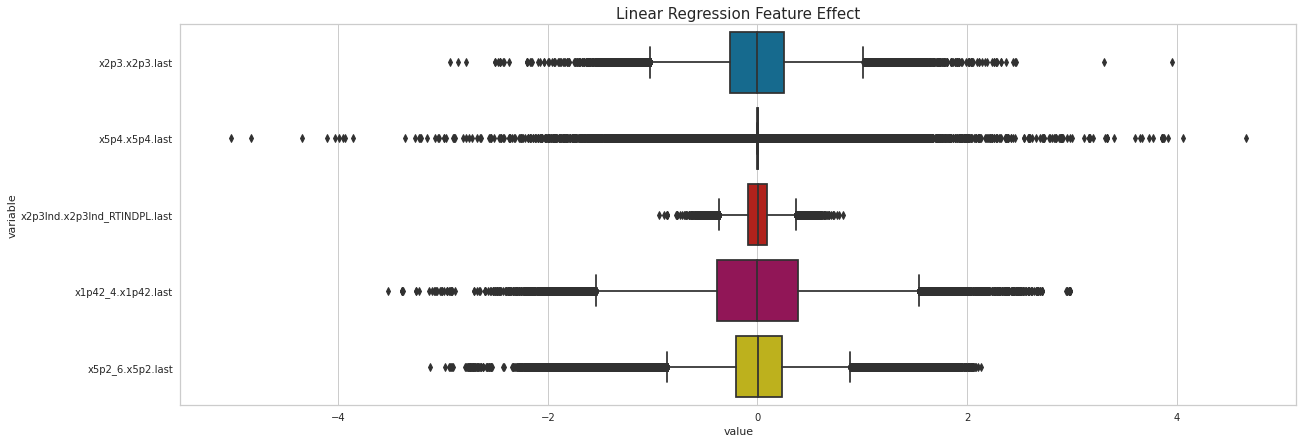

In [31]:
parameters = 'n_jobs=-1'
df_train_columns = ['x2p3.x2p3.last','x5p4.x5p4.last','x2p3Ind.x2p3Ind_RTINDPL.last','x1p42_4.x1p42.last','x5p2_6.x5p2.last',]
#df_train_columns = [c for c in actual.columns if '.last' in c and 'x' in c and 'Time' not in c]
linearRegressionFeatureEffect(train_data, df_train_columns, parameters, coeffs=None, featuresOfIndividualPrediction=None)

In [32]:
parameters = 'min_weight_fraction_leaf=0.01,min_samples_leaf=2,max_depth=4,n_estimators=100,max_samples=0.2,n_jobs=-2,random_state=0'
visualizeDecisionTree(train_data, df_train_columns, parameters, dropZeros = True, dropOutliers = True)
Image(filename = 'tree.png')

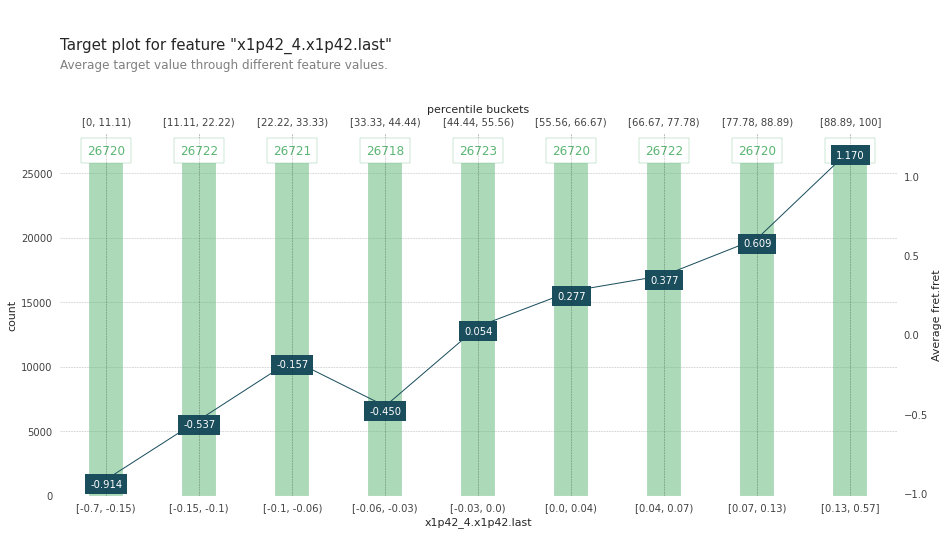

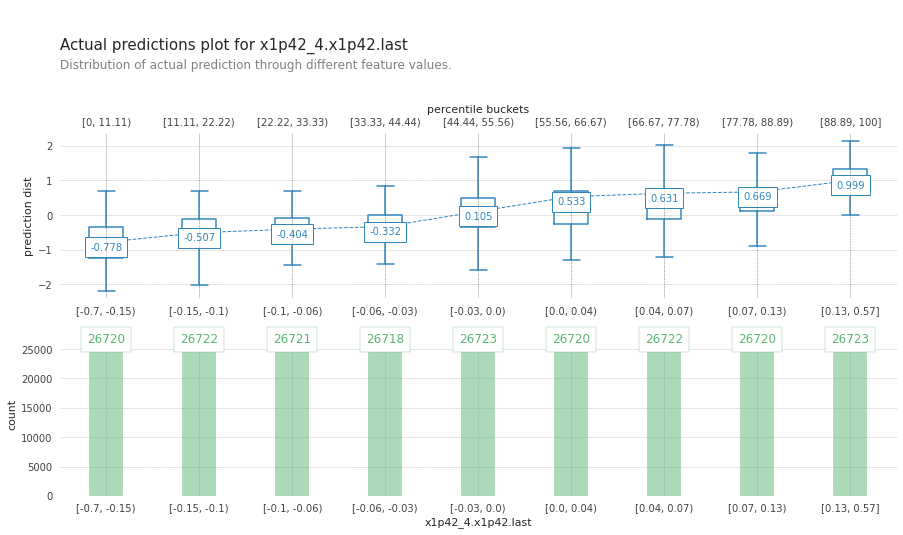

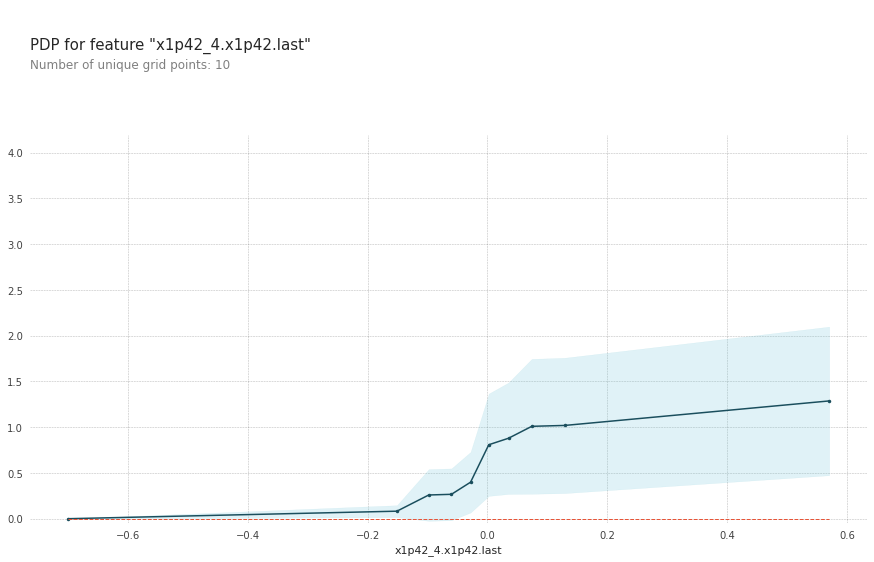

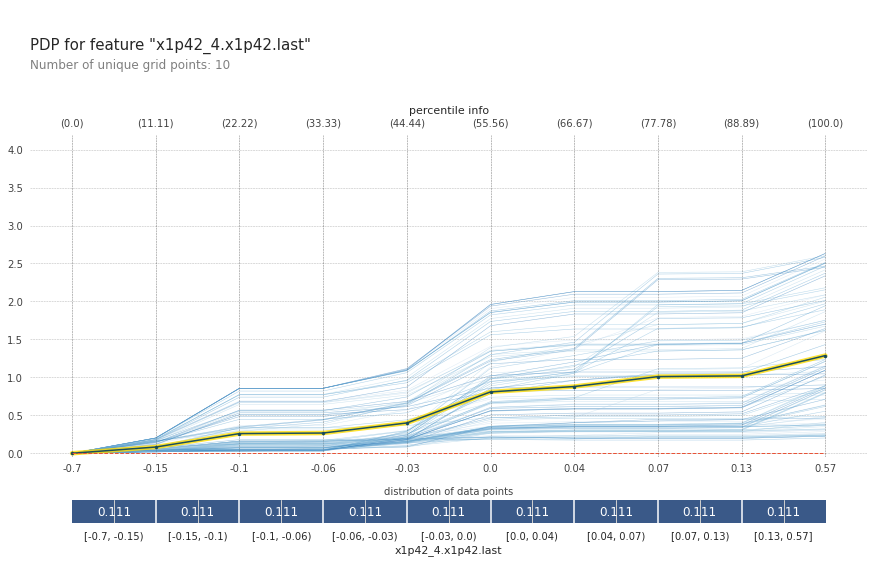

In [14]:
features_to_visualize = ['x1p42_4.x1p42.last'] # list of feature or 'all'

pdpPlot(algorithm, train_data, df_train_columns, target, features_to_visualize, parameters, dropZeros=True, dropOutliers=True, z_score=False)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


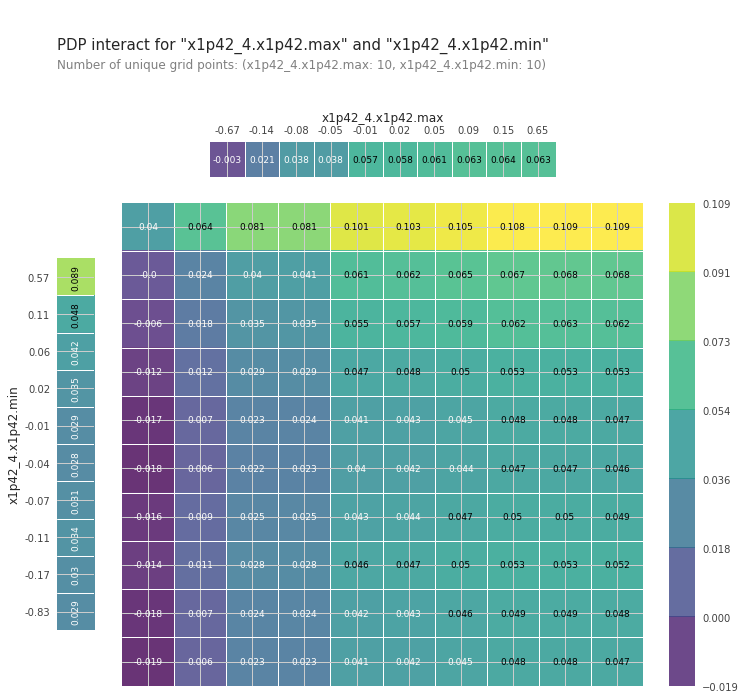

In [9]:
two_features = ['x1p42_4.x1p42.max','x1p42_4.x1p42.min']

pdpPlot2features(algorithm, train_data, df_train_columns, target, two_features, parameters, dropZeros=True, dropOutliers=True, z_score=False)

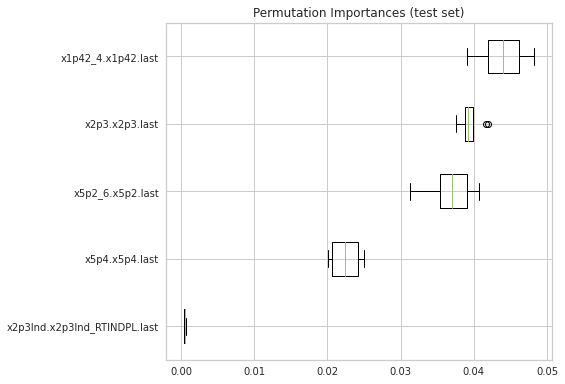

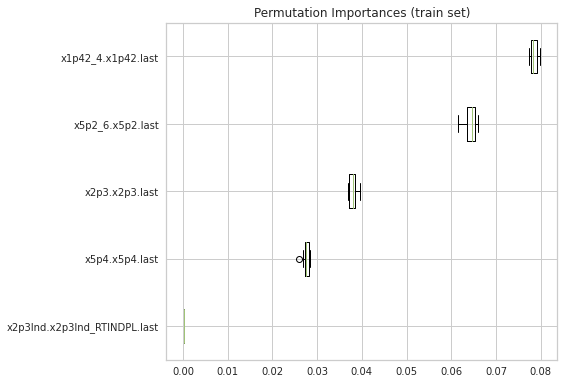

In [33]:
permutationImportancePlot(algorithm, train_data, actual, df_train_columns, target, parameters, dropZeros=True, dropOutliers=True, z_score=False)

5 selected features


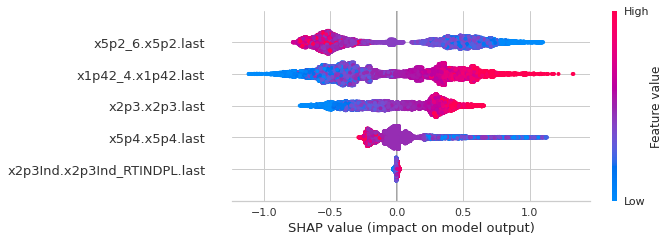

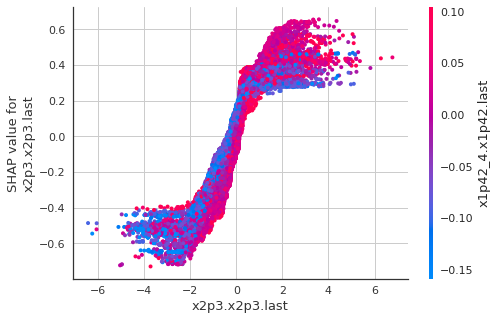

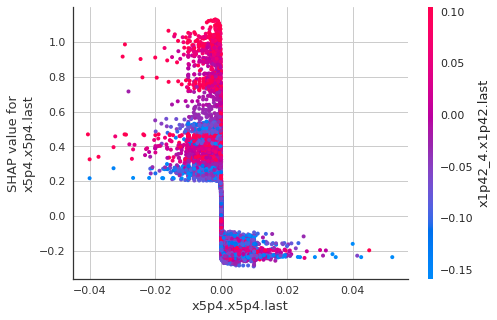

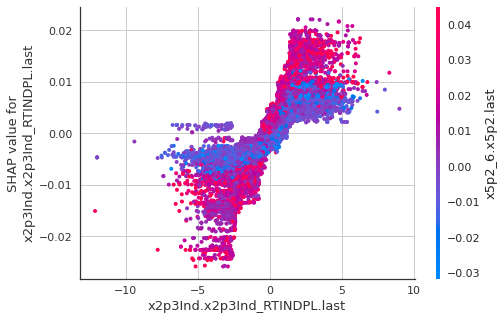

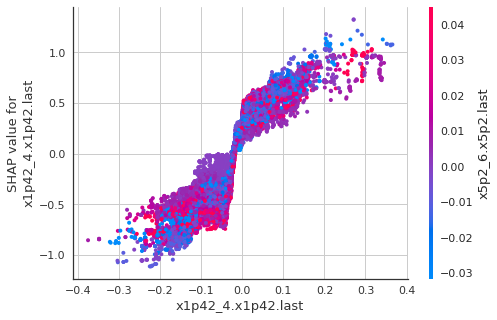

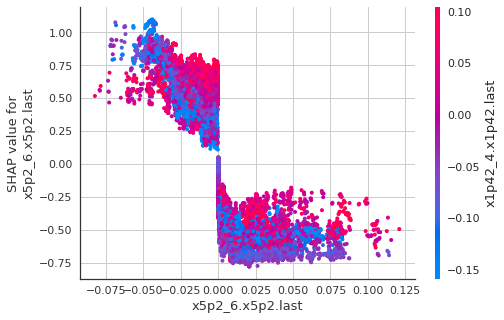

In [34]:
features_to_visualize = 'all'#['x2p3.x2p3.last'] # or 'all'

explainer, shap_values, X_test = shapVisualizations(algorithm, train_data, actual, df_train_columns, target, parameters, features_to_visualize, dropZeros=True, dropOutliers=True, z_score=False)

In [35]:
shap.force_plot(explainer.expected_value, shap_values[1], X_test.iloc[1])

In [36]:
explainer, model, X_test = LIME(algorithm, train_data, actual, df_train_columns, target, parameters, dropZeros=True, dropOutliers=True, z_score=False)

In [37]:
exp = explainer.explain_instance(X_test.iloc[1], model.predict)
exp.show_in_notebook(show_table=True)

Intercept 0.17039240680077017
Prediction_local [-0.54810786]
Right: -0.46163446104323597


In [38]:
[c for c in actual.columns if '.last' in c and 'x' in c and 'Time' not in c]

['x1p42_1.x1p42.last',
 'x1p42_2.x1p42.last',
 'x1p42_3.x1p42.last',
 'x1p42_4.x1p42.last',
 'x1p47HFT_1.x1p47.last',
 'x1p47HFT_2.x1p47.last',
 'x1p47HFT_3.x1p47.last',
 'x1p47HFT_4.x1p47.last',
 'x2p1_1.x2p1.last',
 'x2p1_2.x2p1.last',
 'x2p1_3.x2p1.last',
 'x2p1_4.x2p1.last',
 'x2p1_5.x2p1.last',
 'x2p1_6.x2p1.last',
 'x2p1_7.x2p1.last',
 'x2p1_8.x2p1.last',
 'x2p1_9.x2p1.last',
 'x2p1_10.x2p1.last',
 'x4p22_1.x4p22.last',
 'x4p22_2.x4p22.last',
 'x4p22_3.x4p22.last',
 'x4p22_4.x4p22.last',
 'x4p22_5.x4p22.last',
 'x4p22_6.x4p22.last',
 'x4p22_7.x4p22.last',
 'x4p22_8.x4p22.last',
 'x4p22_9.x4p22.last',
 'x4p22_10.x4p22.last',
 'x5p2_1.x5p2.last',
 'x5p2_2.x5p2.last',
 'x5p2_3.x5p2.last',
 'x5p2_4.x5p2.last',
 'x5p2_5.x5p2.last',
 'x5p2_6.x5p2.last',
 'x5p2_7.x5p2.last',
 'x5p2_8.x5p2.last',
 'x5p2_9.x5p2.last',
 'x5p2_10.x5p2.last',
 'x2p3.x2p3.last',
 'x5p4.x5p4.last',
 'x2p3Ind.x2p3Ind_RTINDPL.last']